<a href="https://colab.research.google.com/github/mazdah/colab_practice/blob/main/%EC%A7%81%EC%9E%A5%EC%9D%B8%EC%9D%84_%EC%9C%84%ED%95%9C_%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# 전처리 기본 - Normalization(정규화)

- 컬럼간에 다른 min, max 값을 가지는 경우, 정규화를 통해 최솟값/최댓값의 척도를 맞추어 주는 것
---

In [1]:
import numpy as np
import pandas as pd

In [ ]:
movie = {
    'naver': [2, 4, 6, 8, 10],
    'netfflix': [1, 2, 3, 4, 5]
}

In [ ]:
movie = pd.DataFrame(data=movie)
movie

,naver,netfflix
0,2,1
1,4,2
2,6,3
3,8,4
4,10,5


In [ ]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_movie = min_max_scaler.fit_transform(movie)
pd.DataFrame(min_max_movie, columns=['naver', 'netfflix'])

,naver,netfflix
0,0.00,0.00
1,0.25,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


---
# 전처리 기본 - Standardization(표준화)

- 평균이 0, 표준편차가 1이 되도록 변환
---

In [ ]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

In [ ]:
# 샘플 데이터 생성
x = np.arange(10)
# outlier 추가
x[9] = 1000

In [ ]:
x.mean(), x.std()

(103.6, 298.8100399919654)

In [ ]:
scaled = standard_scaler.fit_transform(x.reshape(-1, 1))
scaled.mean(), scaled.std()

(4.4408920985006264e-17, 1.0)

In [ ]:
round(scaled.mean()), scaled.std()

(0, 1.0)

---
# Scikit-learn: 분류 - iris 데이터 로드(dataset 활용)

### 데이터 로드하기

- [iris 데이터세트](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)
- 붓꽃 분류
---

In [2]:
import warnings
import pandas as pd
from sklearn.datasets import load_iris

# 불필요한 경고 출력을 막아준다.
warnings.filterwarnings('ignore')

In [3]:
iris = load_iris()

In [ ]:
iris # dictionary 타입의 데이터

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

---
- DESCR : 데이터셋의 정보를 보여줌
- data : feature data
- feature_names : feature data의 컬럼 이름
- target : label data (수치형)
- target_names : label의 이름 (문자형)
---

In [ ]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
data = iris['data']
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [5]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

---
- sepal : 꽃 받침
- petal : 꽃잎
---

In [6]:
target = iris['target']
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

---
### dataset으로부터 데이터프레임 만들기
---

In [8]:
df_iris = pd.DataFrame(data, columns=feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df_iris['target'] = target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


---
### 시각화
---

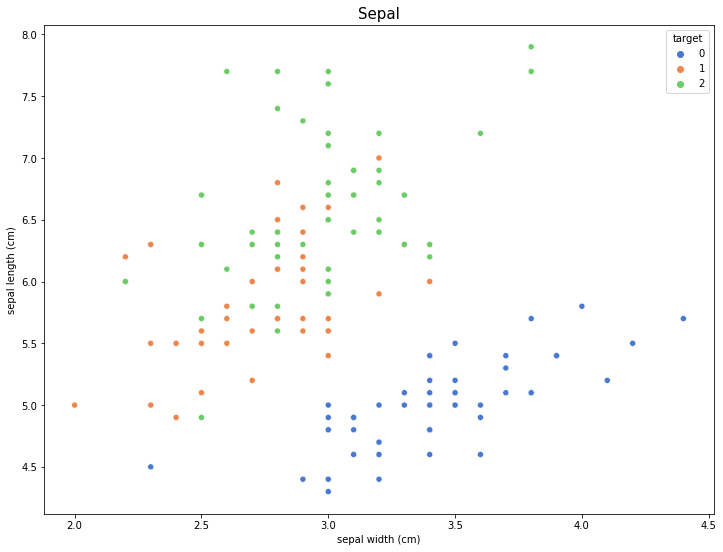

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (12, 9)

sns.scatterplot('sepal width (cm)', 'sepal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal', fontsize=15)
plt.show()

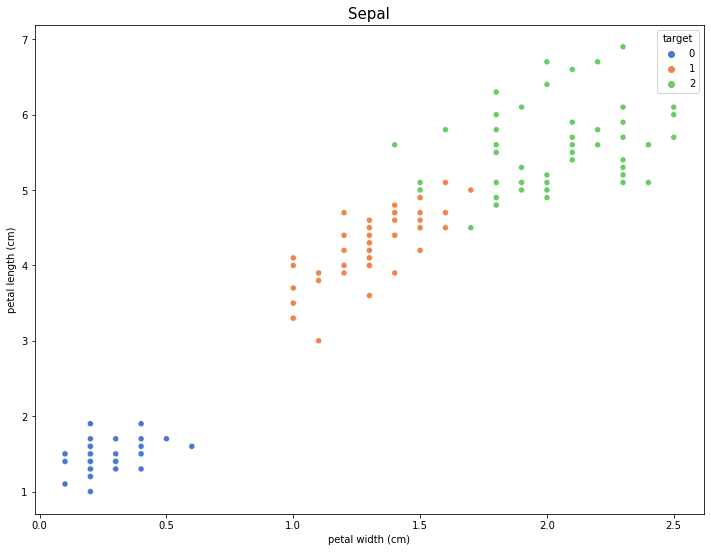

In [ ]:
sns.scatterplot('petal width (cm)', 'petal length (cm)', hue='target', palette='muted', data=df_iris)
plt.title('Sepal', fontsize=15)
plt.show()

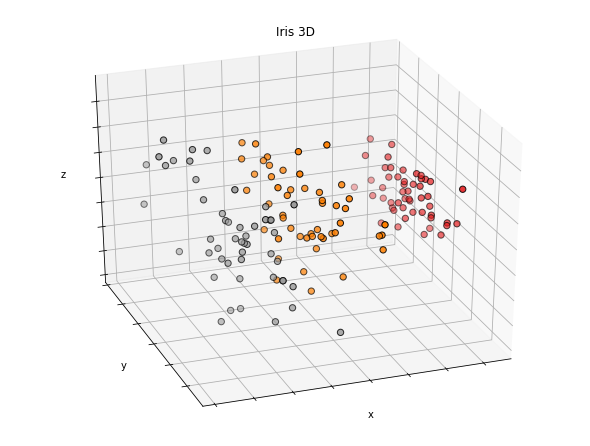

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# PCA (차원축소) : 모두 4가지의 정보를 3차원의 공간에 표시하기 위해 1개의 차원을 제거함
X_reduced = PCA(n_components=3).fit_transform(df_iris.drop('target', 1))
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=df_iris['target'], cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title('Iris 3D')
ax.set_xlabel('x')
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel('y')
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel('z')
ax.w_zaxis.set_ticklabels([])

plt.show()

---
# Scikit-learn : 분류 - 데이터의 불균형(imbalance), 그리고 stratify 옵션

- stratify : label의 클래스 분포를 균등하게 배분
---

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'])
x_train.shape, y_train.shape

((112, 4), (112,))

In [ ]:
x_valid.shape, y_valid.shape

((38, 4), (38,))

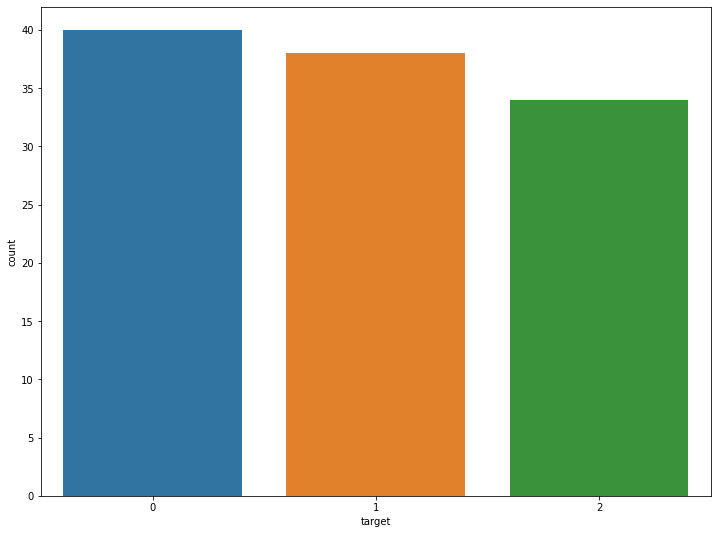

In [ ]:
sns.countplot(y_train)
# 아래와 같이 훈련 샘플이 불균등한 경우 모델의 성능이 나빠진다.

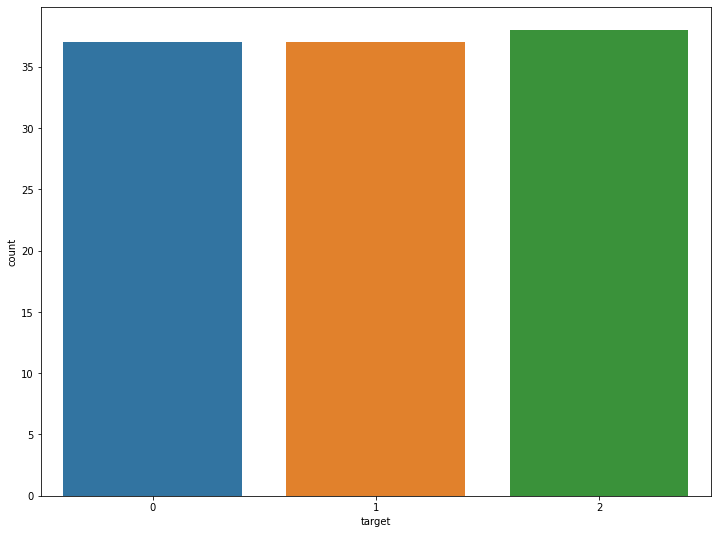

In [12]:
x_train, x_valid, y_train, y_valid = train_test_split(df_iris.drop('target', 1), df_iris['target'], stratify=df_iris['target'])
sns.countplot(y_train)

---
# Scikit-learn : 분류 - Logistic Regression (로지스틱 회귀)

- 독립 변수의 선형 결합을 이용하여 사건의 발생 가능성을 예측하는데 사용되는 통계 기법
- 이진 분류만 가능
- 3개 이상의 클래스를 분류하는 경우 one-vs-rest 또는 one-vs-one 전략을 사용  
  . one-vs-rest(OvR) : K 개의 클래스가 존재할 때 1개의 클래스를 제외한 다른 클래스를 K개 만들어 각각의 이진 분류에 대한 확률을 구하고 총합을 통해 최종 클래스를 판별  
  . one-vs-one(OvO) : 4개의 계절을 구분하는 클래스가 존재한다고 가정했을 때 Ovs1, Ovs2, Ovs3,..., 2vs3까지 NX(N-1)/2 개의 분류기를 만들어 가장 많이 양성으로 선택된 클래스를 판별
- OvsR을 선호함

### 모델 선언, 학습(fit), 예측(predict) 프로세스
---

In [ ]:
from sklearn.linear_model import LogisticRegression

# 모델 선언
lr = LogisticRegression()

In [ ]:
# 학습
lr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# 예측
lr_pred = lr.predict(x_valid)
lr_pred[:5]

array([2, 0, 2, 1, 1])

In [ ]:
# 평가
(lr_pred == y_valid).mean()

0.9736842105263158

---
# Scikit-learn : 분류 - stochastic gradient descent (SGD) : 확률적 경사 하강법
---

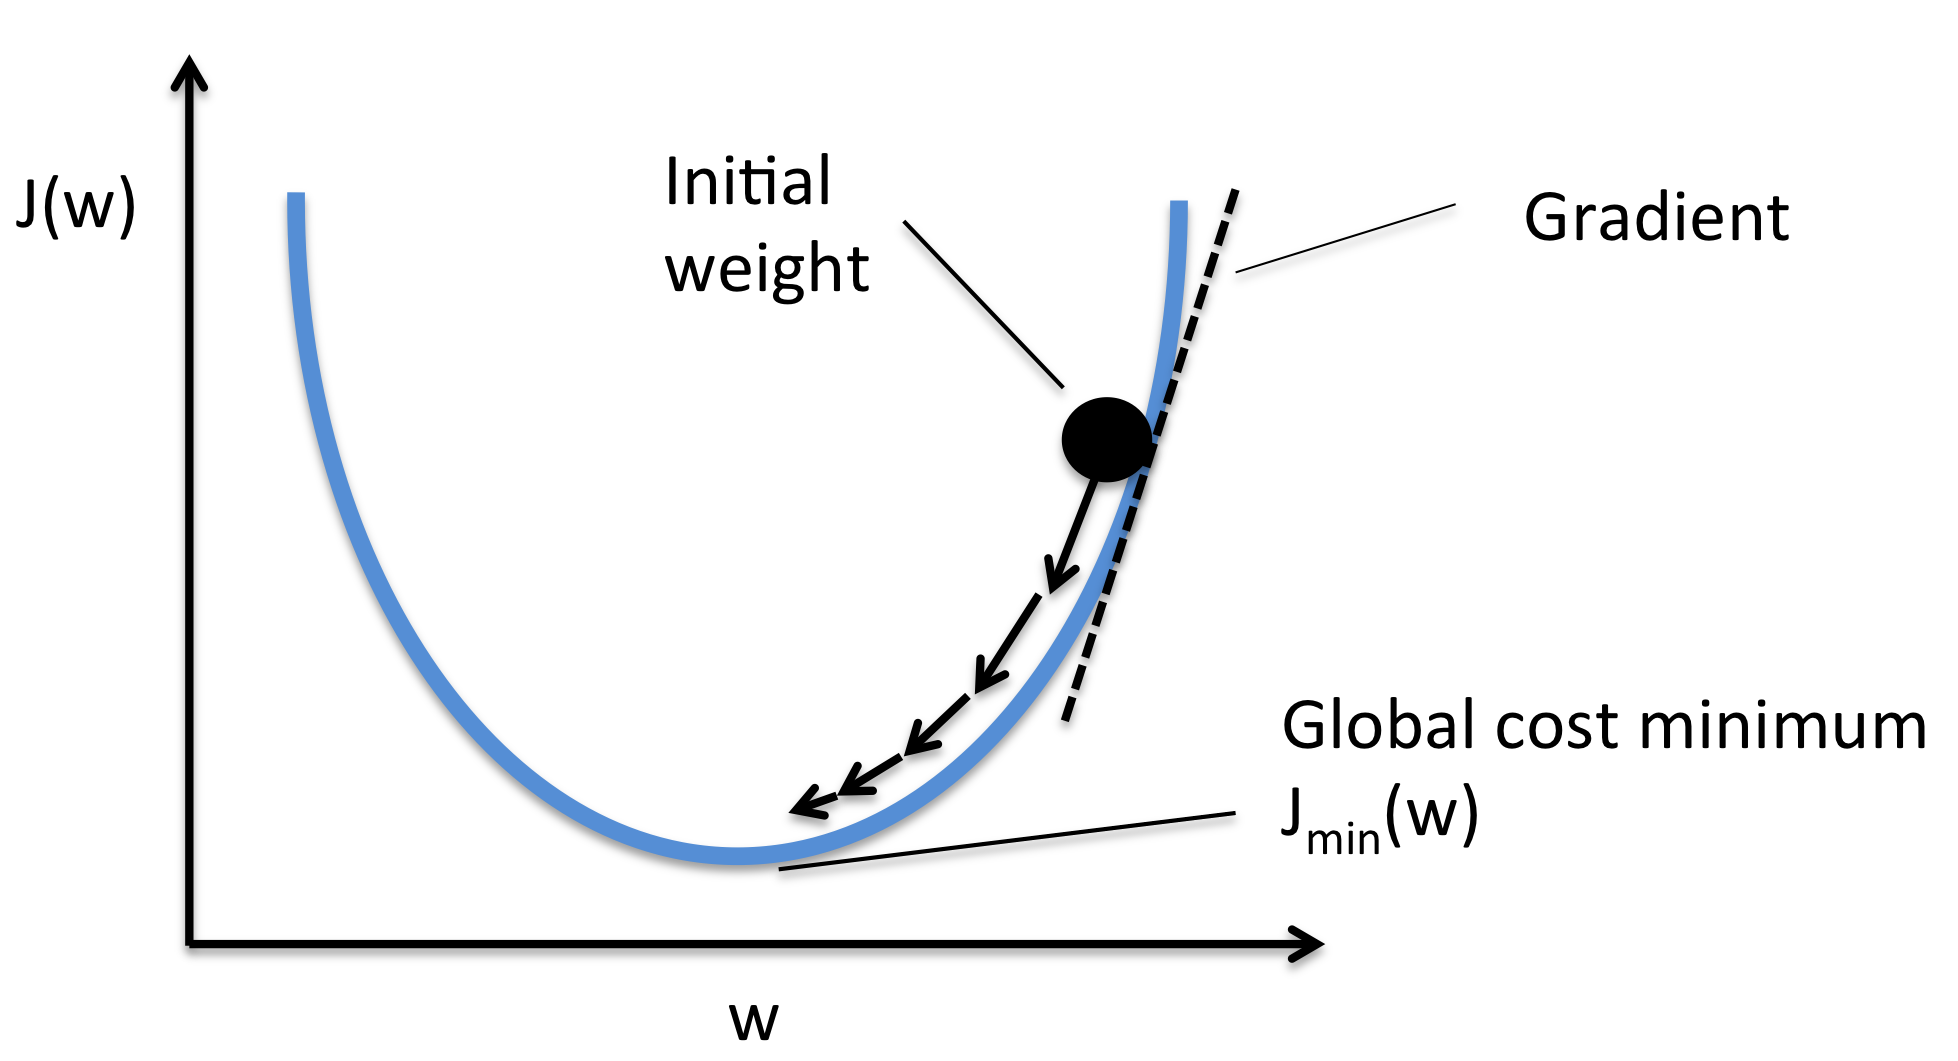

In [13]:
from IPython.display import Image

Image('https://machinelearningnotepad.files.wordpress.com/2018/04/yk1mk.png', width=1024)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgdc = SGDClassifier(random_state=0)
sgdc.fit(x_train, y_train)
sgdc_prediction = sgdc.predict(x_valid)
(sgdc_prediction == y_valid).mean()

0.6842105263157895

---
# Scikit-learn : 분류 - 하이퍼 파라미터(hyper-parameter)

- 학숩 프로세스를 제어하는 파라미터
- 사람이 값을 결정해서 입력해준다.
- 모델 생성 시의 파라미터는 모두 하이퍼 파라미터로 생각하면 됨
---

In [ ]:
# random_state : 하이퍼 파라미터 튜닝 시 고정해야 함 (성능에 영향을 준 파라미터가 어떤 것인지를 알기 위해)
# n_jobs : 사용할 CPU 개수. -1이면 모든 CPU 사용
sgdc = SGDClassifier(penalty='elasticnet', random_state=0, n_jobs=-1)
sgdc.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=-1,
              penalty='elasticnet', power_t=0.5, random_state=0, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
sgdc_prediction = sgdc.predict(x_valid)
(sgdc_prediction == y_valid).mean()

0.9473684210526315

---
# Scikit-learn : 분류 - KNeighborsClassifier(최근접 이웃 알고리즘)

- n_neighbors에 지정된 수의 학습 데이터중 많은 수를 차지하는 쪽으로 테스트 데이터를 분류한다.
- 일반적으로 n_neighbors 파라미터는 동점 확률 문제로 홀수를 사용한다.
- https://ko.wikipedia.org/wiki/K-최근접_이웃_알고리즘
---

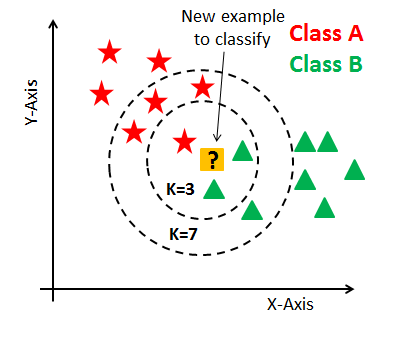

In [ ]:
# 출처: 데이터 캠프
Image('https://res.cloudinary.com/dyd911kmh/image/upload/f_auto,q_auto:best/v1531424125/KNN_final_a1mrv9.png', width=1024)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knc_predict = knc.predict(x_valid)
(knc_predict == y_valid).mean()

0.9473684210526315

In [ ]:
knc = KNeighborsClassifier(n_neighbors=15)
knc.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [ ]:
knc_predict = knc.predict(x_valid)
(knc_predict == y_valid).mean()

0.9473684210526315

---
# Scikit-learn : 분류 - 서포트 벡터 머신 (SVM)

- 새로운 데이터가 어느 카테고리에 속할지 판단하는 비확률적인 **이진 선형 분류** 모델을 만든다.
- 경계로 표현되는 데이터들 중 **가장 큰 폭을 가진 경계**를 찾는 알고리즘
- LogisticRegression과 같이 이진분류만 가능. OvsR 전략 사용
- decision_function()을 통해 각 클래스별 확률값을 확인할 수 있다.
---

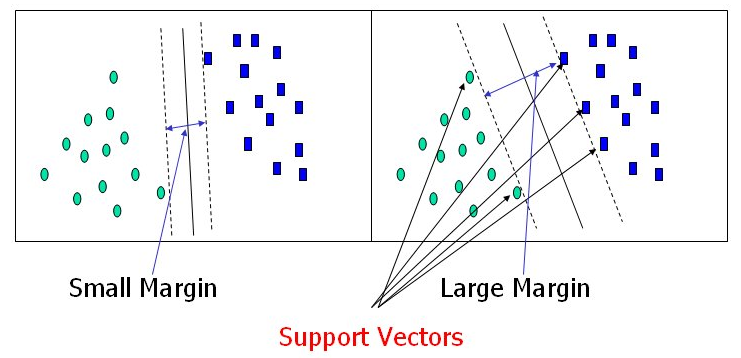

In [ ]:
Image('https://csstudy.files.wordpress.com/2011/03/screen-shot-2011-02-28-at-5-53-26-pm.png', width=1024)

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svc_pred = svc.predict(x_valid)
(svc_pred == y_valid).mean()

0.9736842105263158

In [ ]:
svc_pred[:5]

array([1, 0, 0, 2, 2])

In [ ]:
svc = SVC(random_state=0)
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_valid)
(svc_pred == y_valid).mean()

0.9736842105263158

In [ ]:
svc.decision_function(x_valid)[:5]

array([[-0.21848985,  2.22024458,  0.98563486],
       [ 2.23664164,  1.11287254, -0.24914482],
       [ 2.23353772,  1.13999373, -0.25131722],
       [-0.23436596,  1.08672695,  2.22282749],
       [-0.2159257 ,  0.84120058,  2.24441978]])

In [ ]:
svc_pred[:5]

array([1, 0, 0, 2, 2])

---
# Scikit-learn : 분류 - 결정 트리(Decision Tree)

- tree 형태의 구조에서 가지치기를 통해 소그룹으로 나누어 판별하는 것
---

In [ ]:
Image('https://www.researchgate.net/profile/Ludmila-Aleksejeva-2/publication/293194222/figure/fig1/AS:669028842487827@1536520314657/Decision-tree-for-Iris-dataset.png', width=1024)

<IPython.core.display.Image object>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
dtc_pred = dtc.predict(x_valid)
(dtc_pred == y_valid).mean()

0.8947368421052632

In [ ]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)
(dtc_pred == y_valid).mean()

0.8421052631578947

---
# Scikit-learn : 분류 - graph-viz로 시각화 해보기

- gini계수 : 불순도를 의미하며, 계수가 높을수록 엔트로피가 크다는 의미
- 엔트로피가 크다는 것은 클래스가 혼잡하게 섞여있다는 의미
- 과대적합을 피하기 위해서는 Decision Tree의 max_depth 파라미터를 조정해줄 필요가 있다.
---

In [ ]:
from sklearn.tree import export_graphviz
from subprocess import call

In [ ]:
def graph_tree(model):
    # .dot 파일로 export
    export_graphviz(model, out_file="tree.dot")

    # 생성된 .dot 파일을 .png로 변환
    call(["dot", "-Tpng", "tree.dot", "-o", "decision-tree.png", "Gdpi=600"])

    # .png 출력
    return Image(filename="decision-tree.png", width=500)

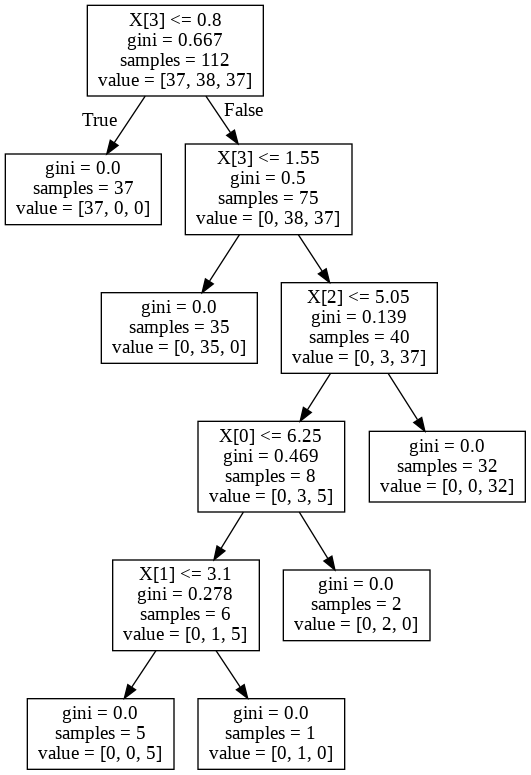

In [ ]:
graph_tree(dtc)

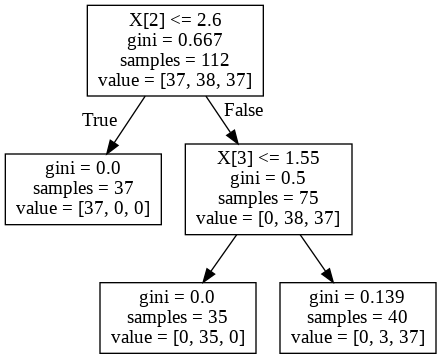

In [ ]:
dtc = DecisionTreeClassifier(max_depth=2)
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_valid)
graph_tree(dtc)

---
# Scikit-learn : 분류 - 정확도(accuracy)의 함점
---

In [14]:
# 유방암 환자 데이터 세트
# target : 0 = 악성종양, 1 = 양성종양
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print(cancer["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [15]:
# 데이터프레임을 만들기 위한 사전 작업
data = cancer["data"]
target = cancer["target"]
feature_names = cancer["feature_names"]

In [16]:
df = pd.DataFrame(data=data, columns=feature_names)
df["target"] = cancer["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [17]:
pos = df.loc[df["target"] == 1]
neg = df.loc[df["target"] == 0]

In [ ]:
pos

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
19,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766,0.2699,0.7886,2.058,23.560,0.008462,0.014600,0.02387,0.013150,0.01980,0.002300,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,1
20,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811,0.1852,0.7477,1.383,14.670,0.004097,0.018980,0.01698,0.006490,0.01678,0.002425,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,1
21,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905,0.2773,0.9768,1.909,15.700,0.009606,0.014320,0.01985,0.014210,0.02027,0.002968,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,1
37,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863,0.1839,2.3420,1.170,14.160,0.004352,0.004899,0.01343,0.011640,0.02671,0.001777,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,1
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,0.1563,0.9567,1.094,8.205,0.008968,0.016460,0.01588,0.005917,0.02574,0.002582,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,14.590,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.037360,0.1454,0.06147,0.2254,1.1080,2.224,19.540,0.004242,0.046390,0.06578,0.016060,0.01638,0.004406,15.480,27.27,105.90,733.5,0.10260,0.31710,0.36620,0.11050,0.2258,0.08004,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.041050,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1
560,14.050,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.043040,0.1537,0.06171,0.3645,1.4920,2.888,29.840,0.007256,0.026780,0.02071,0.016260,0.02080,0.005304,15.300,33.17,100.20,706.7,0.12410,0.22640,0.13260,0.10480,0.2250,0.08321,1
561,11.200,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.000000,0.1060,0.05502,0.3141,3.8960,2.041,22.810,0.007594,0.008878,0.00000,0.000000,0.01989,0.001773,11.920,38.30,75.19,439.6,0.09267,0.05494,0.00000,0.00000,0.1566,0.05905,1


In [ ]:
neg

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,0.9622,1.0260,8.758,118.80,0.006399,0.04310,0.07845,0.02624,0.02057,0.006213,24.29,29.41,179.10,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873,0
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.45,26.40,166.10,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.69,38.25,155.00,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.98,34.12,126.70,1124.0,0.1139,0.3094,0.3403,0.1418,0.2218,0.07820,0


In [18]:
# 양성 환자 데이터 357개에 악성환자 데이터 5개를 추가하여 샘플 데이터를 만든다.
sample = pd.concat([pos, neg[:5]], sort=True) 
x_train, x_valid, y_train, y_valid = train_test_split(sample.drop("target", 1), sample["target"], random_state=42)

In [19]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_valid)

In [20]:
(pred == y_valid).mean()

0.978021978021978

In [21]:
# 무조건 악성 환자로 예측하는 경우가 더 정확도가 높게 나왔음
my_prediction = np.ones(shape=y_valid.shape)
(my_prediction == y_valid).mean()

0.989010989010989

---
# Scikit-learn : 분류 - f1 score

- 정밀도와 재현율의 조화 평균을 나타내는 지표
---

In [25]:
Image('https://miro.medium.com/max/918/1*jCu9fNZS0hSRHVJ2cBTegg.png')

<IPython.core.display.Image object>

$$2*\frac{정밀도 * 재현율}{정밀도 + 재현율}=\frac{TP}{TP+\frac{FN+FP}{2}}$$

In [26]:
from sklearn.metrics import f1_score

f1_score(y_valid, pred)

0.9887640449438202